In [6]:
#Import Libraries and Load Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
wine_data = pd.read_csv('WineQT.csv')

In [4]:
# Basic info about the dataset
print(wine_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [5]:
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [7]:
#Data Preprocessing

In [8]:
# Separate features (X) and target (y)
X = wine_data.drop(['quality', 'Id'], axis=1)  # Features
y = wine_data['quality']  # Target: wine quality

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#Train Classification Models

In [12]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [13]:
# Stochastic Gradient Descent (SGD) Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_predictions = sgd_model.predict(X_test_scaled)

In [14]:
# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)
svc_predictions = svc_model.predict(X_test_scaled)

In [15]:
#Evaluate Models

In [16]:
# Random Forest performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

In [17]:
# SGD performance
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
sgd_cm = confusion_matrix(y_test, sgd_predictions)

In [18]:
# SVC performance
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_cm = confusion_matrix(y_test, svc_predictions)

In [19]:
# Print accuracy scores
print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'SGD Accuracy: {sgd_accuracy}')
print(f'SVC Accuracy: {svc_accuracy}')

Random Forest Accuracy: 0.6986899563318777
SGD Accuracy: 0.5021834061135371
SVC Accuracy: 0.6375545851528385


In [20]:
#Visualize Confusion Matrices

In [21]:
# Function to plot confusion matrices
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

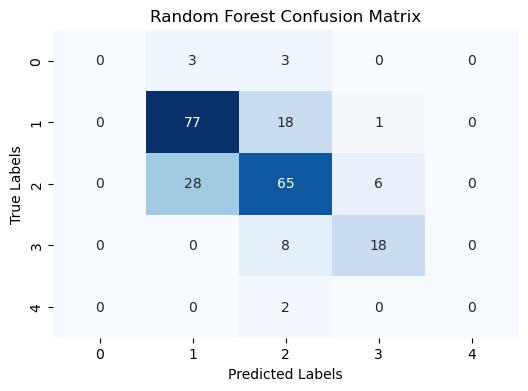

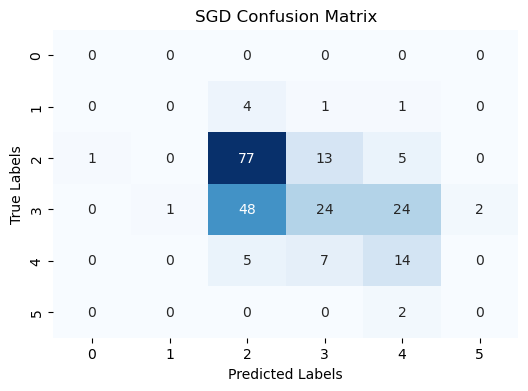

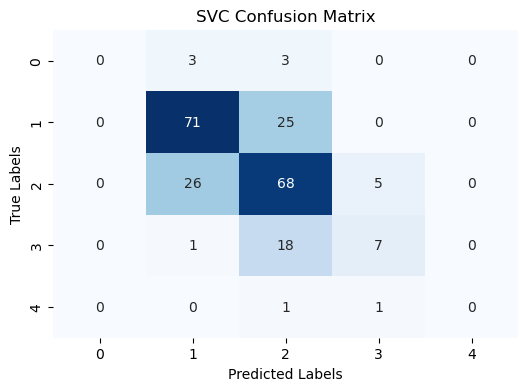

In [22]:
# Visualizing the confusion matrices
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(sgd_cm, "SGD Confusion Matrix")
plot_confusion_matrix(svc_cm, "SVC Confusion Matrix")